<a href="https://colab.research.google.com/github/adrsh98/learning/blob/main/classification_assignmnt.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
#importing libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import OneHotEncoder

In [ ]:
data = pd.read_excel('/content/iris.xls')

In [ ]:
data.head(3)

,SL,SW,PL,PW,Classification
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,NaN,3.2,1.3,0.2,Iris-setosa


In [ ]:
data.shape


(150, 5)

In [ ]:
data.describe()

,SL,SW,PL,PW
count,143.000000,144.000000,144.000000,150.000000
mean,5.855944,3.049306,3.756250,1.198667
std,0.828168,0.430644,1.761306,0.763161
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   SL              143 non-null    float64
 1   SW              144 non-null    float64
 2   PL              144 non-null    float64
 3   PW              150 non-null    float64
 4   Classification  150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


In [ ]:
#checking the null values
data.isna().sum()

,0
SL,7
SW,6
PL,6
PW,0
Classification,0


In [ ]:
#using mean for filling null values
data['SL'].fillna(data['SL'].mean(),inplace=True)
data['SW'].fillna(data['SW'].mean(),inplace=True)
data['PL'].fillna(data['PL'].mean(),inplace=True)

<ipython-input-89-dad5cd345a5b>:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  data['SL'].fillna(data['SL'].mean(),inplace=True)
<ipython-input-89-dad5cd345a5b>:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try usi

In [ ]:
data.isna().sum()

,0
SL,0
SW,0
PL,0
PW,0
Classification,0


In [ ]:
data.nunique()

,0
SL,36
SW,24
PL,44
PW,22
Classification,3


In [ ]:
#custom encoding

In [ ]:
data.head()

,SL,SW,PL,PW,Classification
0,5.100000,3.5,1.4,0.2,Iris-setosa
1,4.900000,3.0,1.4,0.2,Iris-setosa
2,5.855944,3.2,1.3,0.2,Iris-setosa
3,4.600000,3.1,1.5,0.2,Iris-setosa
4,5.000000,3.6,1.4,0.2,Iris-setosa


In [ ]:
data.Classification.value_counts()

,count
Classification,
Iris-setosa,50
Iris-versicolor,50
Iris-virginica,50


In [ ]:
manual_mapping = {'Iris-setosa':0,'Iris-versicolor':1,'Iris-virginica':2}

In [ ]:
data['Classification']= data['Classification'].map(manual_mapping)

In [ ]:
data.head()

,SL,SW,PL,PW,Classification
0,5.100000,3.5,1.4,0.2,0
1,4.900000,3.0,1.4,0.2,0
2,5.855944,3.2,1.3,0.2,0
3,4.600000,3.1,1.5,0.2,0
4,5.000000,3.6,1.4,0.2,0


In [ ]:
#by analising there is outliers for sw
outlier_checking = ['SL', 'SW', 'PL', 'PW']
Q1 = data[outlier_checking].quantile(0.25)
Q3 = data[outlier_checking].quantile(0.75)
IQR = Q3 - Q1

outliers_lower = data[outlier_checking] < (Q1 - 1.5 * IQR)
outliers_upper = data[outlier_checking] > (Q3 + 1.5 * IQR)

outliers_mild = outliers_upper | outliers_lower
print(data[outliers_mild])


     SL  SW  PL  PW  Classification
0   NaN NaN NaN NaN             NaN
1   NaN NaN NaN NaN             NaN
2   NaN NaN NaN NaN             NaN
3   NaN NaN NaN NaN             NaN
4   NaN NaN NaN NaN             NaN
..   ..  ..  ..  ..             ...
145 NaN NaN NaN NaN             NaN
146 NaN NaN NaN NaN             NaN
147 NaN NaN NaN NaN             NaN
148 NaN NaN NaN NaN             NaN
149 NaN NaN NaN NaN             NaN

[150 rows x 5 columns]


In [ ]:
#capping outliers
data[outlier_checking] = data[outlier_checking].clip(lower=Q1 - 1.5 * IQR, upper=Q3 + 1.5 * IQR,axis=1)

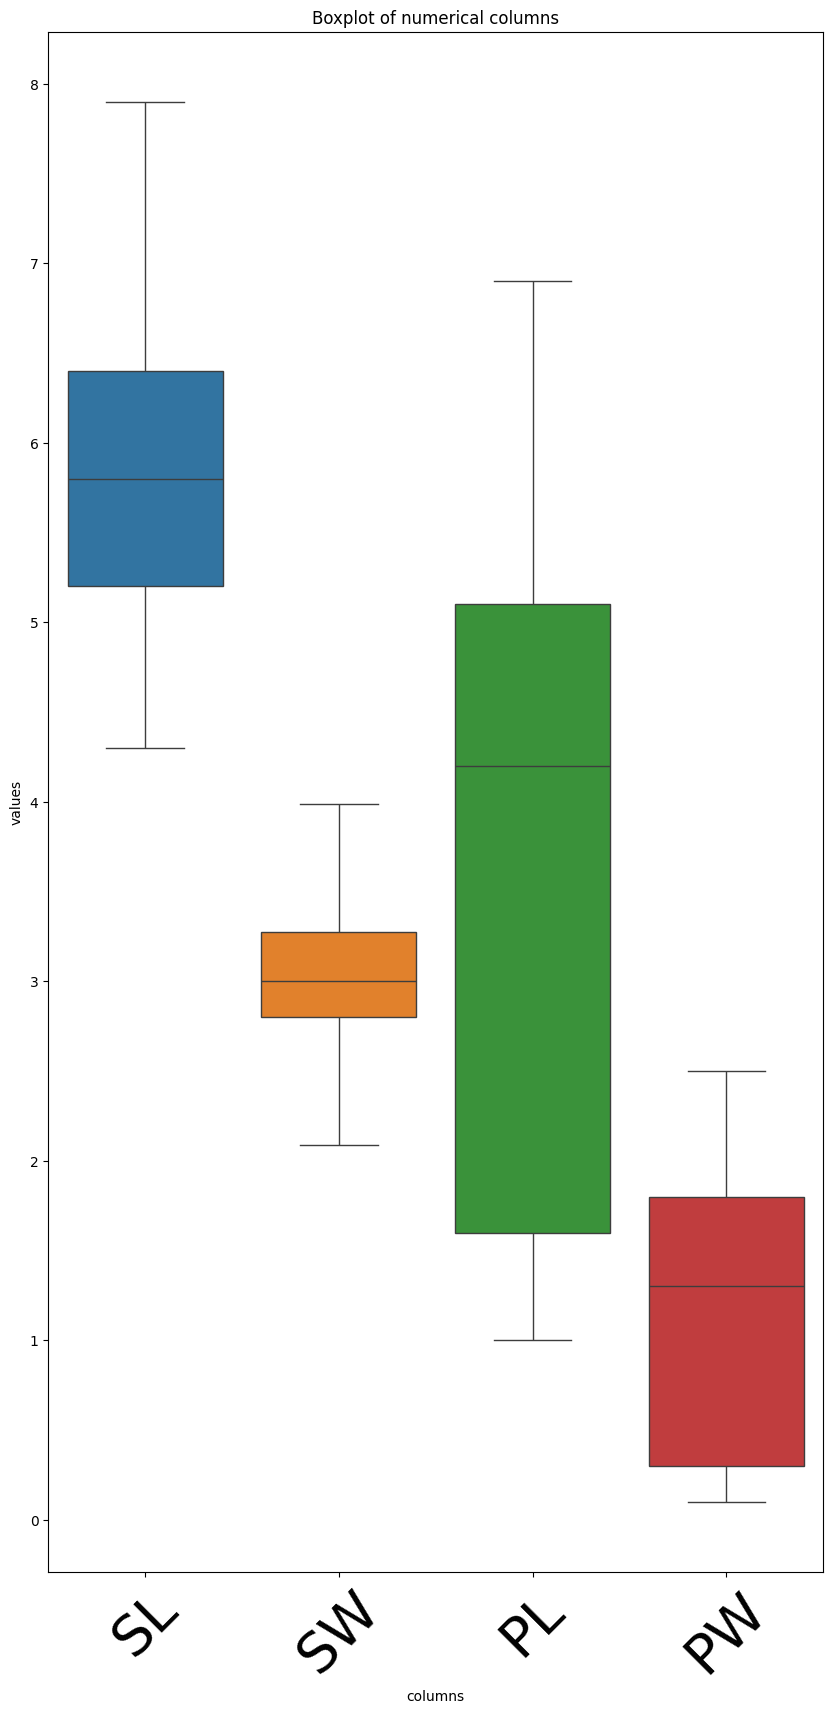

In [ ]:
#rechecking
numerical_columns = ['SL', 'SW', 'PL', 'PW']
plt.figure(figsize=(10,20))
sns.boxplot(data=data[numerical_columns])
plt.title('Boxplot of numerical columns')
plt.xlabel('columns')
plt.ylabel('values')
plt.xticks(rotation=45,fontsize=40)
plt.show()

In [ ]:

#hence there is no outliers
#no need of scaling all the datas are in similar range

In [ ]:
data.head()


,SL,SW,PL,PW,Classification
0,5.100000,3.5,1.4,0.2,0
1,4.900000,3.0,1.4,0.2,0
2,5.855944,3.2,1.3,0.2,0
3,4.600000,3.1,1.5,0.2,0
4,5.000000,3.6,1.4,0.2,0


In [ ]:
#defining x and y
x = data.drop(['Classification'],axis=1)
y = data['Classification']

In [ ]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2,random_state=42)

In [ ]:
x_train.shape

(120, 4)

In [ ]:
x_test.shape

(30, 4)

In [ ]:
#logistic regression
from sklearn.linear_model import LogisticRegression
logit_model = LogisticRegression()
logit_model.fit(x_train,y_train)
y_pred = logit_model.predict(x_test)

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [ ]:
from sklearn.metrics import accuracy_score,confusion_matrix,precision_score,recall_score,f1_score
print('Accuracy is', accuracy_score(y_test, y_pred))
print('Precision is', precision_score(y_test, y_pred,average='micro'))
print('Recall is', recall_score(y_test, y_pred,average='micro'))
print('F1 score is', f1_score(y_test, y_pred,average='micro' ))

Accuracy is 1.0
Precision is 1.0
Recall is 1.0
F1 score is 1.0


In [ ]:
confusion_matrix(y_test,y_pred)

array([[10,  0,  0],
       [ 0,  9,  0],
       [ 0,  0, 11]])

In [ ]:
y_pred

array([1, 0, 2, 1, 1, 0, 1, 2, 1, 1, 2, 0, 0, 0, 0, 1, 2, 1, 1, 2, 0, 2,
       0, 2, 2, 2, 2, 2, 0, 0])

In [ ]:
y_test

,Classification
73,1
18,0
118,2
78,1
76,1
31,0
64,1
141,2
68,1
82,1


In [ ]:
#k-nearest neighbor

from sklearn.neighbors import KNeighborsClassifier
metric_k = []
neighbors = np.arange(3,15)

for k in neighbors:
  classifier = KNeighborsClassifier(n_neighbors=k,metric='minkowski')
  classifier.fit(x_train,y_train)
  y_pred = classifier.predict(x_test)
  acc = accuracy_score(y_test,y_pred)
  metric_k.append(acc)

In [ ]:
metric_k

[0.9666666666666667,
 1.0,
 0.9666666666666667,
 0.9666666666666667,
 0.9666666666666667,
 0.9666666666666667,
 0.9666666666666667,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0]

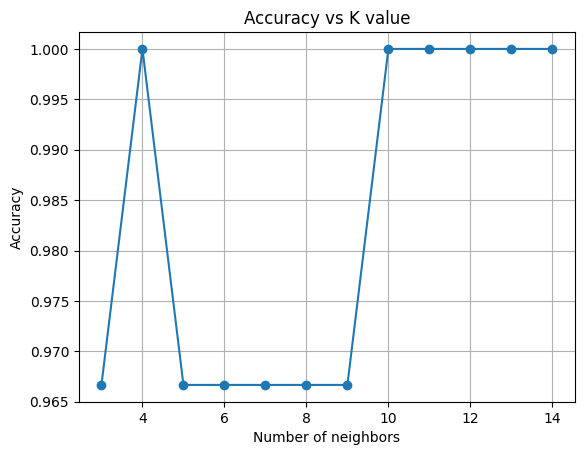

In [ ]:
plt.plot(neighbors,metric_k,'o-')
plt.title('Accuracy vs K value')
plt.xlabel('Number of neighbors')
plt.ylabel('Accuracy')
plt.grid()

In [ ]:
classifier = KNeighborsClassifier(n_neighbors=5,metric='minkowski',p=4)
classifier.fit(x_train,y_train)
y_pred = classifier.predict(x_test)
acc = accuracy_score(y_test,y_pred)

In [ ]:
from sklearn.metrics import accuracy_score,confusion_matrix,precision_score,recall_score,f1_score
print('Accuracy is', accuracy_score(y_test, y_pred))
print('Precision is', precision_score(y_test, y_pred,average='micro'))
print('Recall is', recall_score(y_test, y_pred,average='micro'))
print('F1 score is', f1_score(y_test, y_pred,average='micro' ))

Accuracy is 0.9666666666666667
Precision is 0.9666666666666667
Recall is 0.9666666666666667
F1 score is 0.9666666666666667


In [ ]:
#svm
from sklearn.svm import SVC
sv_clf = SVC(kernel='linear',random_state=0)
sv_clf.fit(x_train,y_train)
y_pred = sv_clf.predict(x_test)
print('Accuracy is', accuracy_score(y_test, y_pred))

Accuracy is 1.0


In [ ]:
print('Precision is', precision_score(y_test, y_pred,average='micro'))
print('Recall is', recall_score(y_test, y_pred,average='micro'))
print('F1 score is', f1_score(y_test, y_pred,average='micro' ))

Precision is 1.0
Recall is 1.0
F1 score is 1.0


In [ ]:
#decision tree

from sklearn.tree import DecisionTreeClassifier
dt_clf = DecisionTreeClassifier(criterion='entropy',random_state=42)
dt_clf.fit(x_train,y_train)
y_pred = dt_clf.predict(x_test)

In [ ]:
print('Accuracy is', accuracy_score(y_test, y_pred))
print('Precision is', precision_score(y_test, y_pred,average='micro'))
print('Recall is', recall_score(y_test, y_pred,average='micro'))
print('F1 score is', f1_score(y_test, y_pred,average='micro' ))

Accuracy is 1.0
Precision is 1.0
Recall is 1.0
F1 score is 1.0
